# Introduction

To facilitate understanding and pace, let's summarize the other steps we've taken. First of all, we have two sets of data: the *train* and the *test*, which are used respectively to adjust or train the model and to predict home sales. Train dataset has of 81 variables, a slightly high number and it is for this reason that we have carried out an Exploratory Data Analysis to reduce the number.  Finally, only 6 were significant. 

The aim of this work is to establish a model to predict the price of homes in Ames, therefore, we have done an exhaustive study on the most important variable (also called response variable): *SalePrice*. We have seen that the original data follow a biased distribution and we have corrected it for better results.

Now it is time to build the model , a process that will be divided into 3 sections:

1. Arrangement of the data for the model
2. Model building
3. Model prediction

## 1. Arrangement of the data for the model

Now that we have the data set clean and ready it's time to make the prediction model. First we import the data generated in the previous step: 

In [1]:
import pandas as pd
import pandas as pd #
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# First we import our new train
train_path = r'./input/Train_Filtered_step2.csv'
train = pd.read_csv(train_path)

In [2]:
# We will use the info method to gain information about our dataset (see Step 1 for further information)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
Unnamed: 0     1460 non-null int64
SalePrice      1460 non-null float64
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
GarageArea     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
dtypes: float64(1), int64(7)
memory usage: 91.4 KB


First of all, to evaluate the type of variables we have. Let's remember that we are going to build a mathematical model, so we need numerical variables to be able to proceed. In our case, all variables are numerical (int64) so it is not necessary to make any transformation.

=== The **Appendix Section 2** contains complementary information on how to translate categorical variables (characters) into numbers or vectors===

**Final preparation of the training dataset**

Machine learning algorithms are described as learning a target function (f) that best maps input variables (X) to an output variable (Y) or response variable.

Y = f(X)

This is a general learning task where we would like to make predictions in the future (Y) given new examples of input variables (X). In our case, the input variables (X) correspond to: 

*OverallQual    
GrLivArea      
GarageCars     
GarageArea     
TotalBsmtSF    
FullBath*     

whereas the output variable (Y) is what we want to predict so: *SalesPrice*

In [3]:
y = train['SalePrice']
train = train.drop(['SalePrice'], axis = 1) # we have to drop the response variable

**Splitting the data**

Before choosing which algorithms we are going to use to build our prediction model we have to consider **how are we going to evaluate its performance**. 

Now we should be preparing the data for our regression model by splitting our data into two distinct sets of data —one for Training and another for Testing.

Why do we do this instead of just using the entire dataset? Because while training our model, the algorithm will attempt to adjust the model to the given data and will be fairly accurate in predicting the *Sales Price*. But this is not what we want.
We want a model which is able to accurately predict outcomes given variable combinations which it does not know or have seen before. In other words a model is only good if it can predict accurately using new data.

There are several ways to perform this split and in this precedure we are going to use the *Train_Test Split approach*. We will randomly split the complete data into training and test sets. Then Perform the model training on the training set and use the test set for validation purpose, ideally split the data into 70:30 (train : test). 


In [4]:
# Import the splitting function to the data and an additional cross validation function
from sklearn.model_selection import train_test_split, cross_val_score

# We will split our dataset randomly in order to have a test data containing 30% of the data,
X_train, X_test, y_train, y_test = train_test_split(train,y, 
                                                    test_size=0.3, 
                                                    random_state=42)
# view number of training and testing data
print('Our training target/prediction variable contains :',len(y_train) ,'rows')
print('Our training input variables contains :',len(X_train) ,'rows')
print('Our testing target/prediction variables contains :',len(y_test) ,'rows')
print('Our testing input variable contains :',len(X_test) ,'rows')

Our training target/prediction variable contains : 1022 rows
Our training input variables contains : 1022 rows
Our testing target/prediction variables contains : 438 rows
Our testing input variable contains : 438 rows


## 2. Model building

To facilitate the comprehension, this section will be divided into:
    
    a) Initialization of the model and parameters
    b) Training the model and Cross-validation
    c) Testing the model
    d) Evaluation of the model

### a) Initialization of the model and parameters

Selecting the model is not very difficult if you are using Python that has so many model libraries. The most important thing is to choose the **correct algorithm** that fits and describes the problem and then select the Model Parameters to initialize the model. We can define *Model Parameters* as the set of mathematical rules that the model neededs to fit. The value of this parameters define the "weight" and the "bias" of those rules which, for example, makes the penalty level of the algorithm or the reaction points different. A similar model with different parameter values could result in very different and/or unbiased results.

As in all life situations, the simplest option, if it works best. That is why we will test one common algorithm in this first attemp: **Ridge Regression** which works very effectively to reduce the complexity of the model and avoid the over-adjustment that can result from simple linear regression.

#### Ridge Regression algorithm

*Ridge Regression* is used to reduce the coefficient values of the model for variables that suffer from multicollinearity. To do this, it uses a regularization function to control bias. The force of the adjustment is determined by the alpha value. Too low an alpha value and the regularization function does nothing to control the coefficients and returns to a simple regression model.


In [5]:
# First of all let's import the library
import sklearn.metrics
from sklearn.linear_model import Ridge

# Instantiate the regression model and setting parameters
reg_model = Ridge(alpha=1, solver= 'svd')

### b) Training the model and Cross-validation

**Training of the model**

Now it is time to fit our training data to the model, which would run the regression algorithm towards the data and will return the coefficient values for each target variable and an intercept value

In [6]:
# Let's fit the train set into the model
reg_model.fit(X_train, y_train)

# Return the coefficients
print(pd.DataFrame({'features':X_train.columns,'coeficients':reg_model.coef_}))

      features  coeficients
0   Unnamed: 0    -0.000020
1  OverallQual     0.123221
2    GrLivArea     0.000148
3   GarageCars     0.115396
4   GarageArea     0.000045
5  TotalBsmtSF     0.000109
6     FullBath     0.046837


From the coefficients that we have just calculated we can approximate our prediction function as such:

**SalesPrice = 0.12[OverallQual] + 0[GrLivArea] + 0.11[GarageCars] + 0[GarageArea] + 0[TotalBsmtSF] + 0.04[FullBath]**

The value that accompanies each of the input variables is an indication of the weight that this variable has to explain the data. Thus, we can see that the most important variables are OverallQual and GarageCars. The other variables do not have an impact on the prediction model.

**Cross-validation with K-folds**

Cross validation is a technique that aims to produce a more comprehensive result of statistical analysis by working through every available data on a rotational basis. We are going to run **K-Fold Cross Validation** on our model. Below is a brief overview of the technique.

We normally have to choose a K value, for instance K = 10.

Then we divide our data into 10 equal parts and we take the first part and make that your testing set leaving the remaining 9 part for training. Then, it is time to build the model and compute the accuracy score. This process is repeated the 2nd part as the testing set (instead of the first), and the 3rd part and so on until all 10 parts have been used for testing. To assess the results the average scores for all 10 iterations is computed.

Let’s run our cross-validation and save the scores for evaluation later.

In [7]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model = Ridge() #Let's initialize the method 
cv_scores = cross_val_score(cv_reg_model, X_train, y_train,cv=10, scoring='r2') # Let's define the K and the 

print('Cross Validation scores: {}'.format(cv_scores.round(2)))
print("\nAverage 10-Fold CV Score: {}".format(np.mean(cv_scores).round(3)))

Cross Validation scores: [0.83 0.82 0.65 0.46 0.84 0.77 0.78 0.84 0.75 0.86]

Average 10-Fold CV Score: 0.76


### c) Testing the model

It is time now to predict the test data through the trained regression model. The output will be our model’s prediction of Sale Price given values of the independent variables.

For a better understanding, we are going to represent them in a plot.

Sample predictions for the first 5 houses are:
 [11.815 12.514 11.809 12.074 12.631]


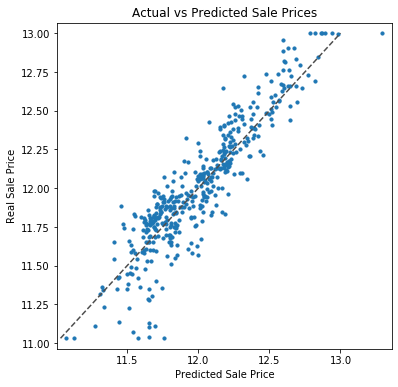

In [8]:
# We will predict the Sales Price of our test sett
y_pred = reg_model.predict(X_test)
print('Sample predictions for the first 5 houses are:\n', y_pred[:5].flatten().round(3))

y_pred_a = pd.DataFrame(y_pred)
y_test_a = y_test.reset_index(drop=True, inplace=False)
# We create a new dataframe containing both the real (y_test) and the predicted value by the model (y_pred)
pred_act_df = pd.concat([y_test_a,y_pred_a], axis=1).sort_values(1,axis=1).reset_index(drop=True)

# Let's represent the preducted values vs the real House value
plt.figure(figsize=(6, 6))
maxlimit = pred_act_df['SalePrice'].max()
minlimit = pred_act_df['SalePrice'].min()

plt.xlim(-1, maxlimit)
plt.ylim(-1, maxlimit)
plt.scatter(pred_act_df[0], pred_act_df['SalePrice'], s=10)
plt.xlabel('Predicted Sale Price')
plt.ylabel('Real Sale Price')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.plot([minlimit,maxlimit], [minlimit,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted Sale Prices')
plt.show()

In the graph above, for each house we see a representation of its real value against the one predicted by the model. The closer the points of the diagonal line are, the better the accuracy of our predictions (this would mean that our predicted values match the actual values).  The dots above the line indicate a prediction value lower than the real value and vice versa.

### d) Evaluation of the model

It’s finally time to evaluate the regression model that we built. Every machine learning model has different sets of metrics for determining how accurate is the model.

For regression models which deal with predicting numerical values, evaluation metrics are:
- Root Mean Squared Error (RMSE)
- R-square and/or Adjusted R-squared
- Residual Plots

**Root Mean Squared Error (RMSE)**


The RMSE is a very good metric to evaluate regression models as it provides a clear value which represents the amount of total ‘error’ in the model. A lower RMSE value is desired.

In [9]:
from sklearn.metrics import mean_squared_error

y_pred_test = reg_model.predict(X_test)
y_pred_train = reg_model.predict(X_train)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test)).round(3)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train)).round(3)

print("Root Mean Squared Error of Training Set: {}".format(rmse_train))
print("Root Mean Squared Error of Testing Set: {}".format(rmse_test))

Root Mean Squared Error of Training Set: 0.178
Root Mean Squared Error of Testing Set: 0.166


**RMSE** is calculated from the prediction variable, if the subject you are trying to predict has values ranging from 0 to 1, your **RMSE** is likely to be very small. 

In our case, the target variable (*SalePrice*) ranges from 11-13 aproximately. Those values may sound really small but let me remind you that on Step 2, we applied a transformation in order to achive normal distribution of the *SalesPrice* of the different houses. Taking into account this consideration we can say that RMSE is really small so that the error on the predictions is quite small as well. 

We will also use **RMSE** to compare between iterations of the same model or between training and testing models. If both calculated **RMSE** are quite similar, it indicates that the model is not under or over fitted. That is our case, so let's continue analysing the other evaluation metrics!

**R-squared (R^2)**

*R-square* explains the amount of model variability attributed to target variable, in our case  *SalePrice*. The R-squared values always range between 0 and 1, generally the higher the value the better. It tells us how well did our model fitted to the data. 

In [10]:
#R2 for the training and testing scores
print("Training set score: {:.2f}".format(reg_model.score(X_train, y_train)))

print("Average Cross-Validation Score: {}".format(np.mean(cv_scores).round(3)))

Training set score: 0.78
Average Cross-Validation Score: 0.76


In our case, R-squared deals around 0.70 which means that 70% of the variation in house prices data which we have can be attributed to the input variables which have included. 

**Residual plot**

The **residuals** of an adjusted model are the differences between the predicted real values in each combination of values of the explanatory variables and the corresponding prediction of the response calculated using the mode.  In our case of study, they will be the real Price of the house and the one predicted by the model

One really intuitive way to analyse them is by plotting them. This is a graph which plots each positive and negative residual error which are the outcome of actual values minus the predicted values.

Ideally, we want our **residual errors to be free of bias** and form a clear nondescript pattern of distribution across the mean. If our model is able to capture (almost) all the information which influence the actual predicted values, what would be left are errors which would only occur due to random chance. These error values thus behave and appear randomly.

For a better understanding, it is possible to represent a *Probability Plot* which will also help us check for normality of the residuals, if all the point fits on the straight line then the residuals are 'normal'.

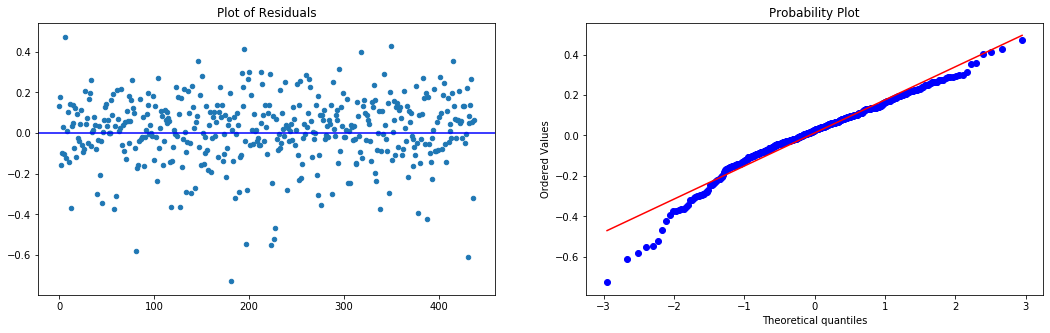

In [11]:
from scipy import stats

# Let's first calculate the residuals
y_pred = pd.DataFrame(y_pred)
y_test = y_test.reset_index(drop=True)
residuals = y_test - y_pred[0]

# Plot the residuals
plt.figure(figsize=(18, 5))
plt.subplot(1,2,1)
plt.axhline(0, color="blue")
plt.title('Plot of Residuals')
plt.scatter(residuals.index,residuals, s=20)

# Plot the Probability plot
plt.subplot(1,2,2)
plt.title('Probability Plot')
stats.probplot(residuals, dist='norm',plot=plt)
plt.show()

The *Plot of Residuals* (left graph)reveal that our error values are distributed rather evenly across the expected mean of zero, this is a good sign. However there are a couple of distinct outliers present.

The *Probability Plot* also indicates that the residuals are not exactly ‘normal’. The slight downward shape of the curve implies a right-skewed distribution and the outliers are very evident. It could be that the outliers are affecting our model’s accuracy and dealing with them could bring us better results.

### e) Evaluation summary

The evaluation metrics and plots of the model are thus used to validate the model within known acceptable value range and to compare between different future versions or iteration of the model for ‘prediction strength’.

While the current prediction function is now ready to be applied, there are some improvements which can be made to the model:

- Repeat the EDA analysis and consider the addition of more variables to the analysis
- Use a more complex regression algorithm such as XGBOOST or SVR

Building a machine learning model is not a plug and chug process because the process and outcome is influenced by:

- The choice of algorithm and assumption which is taken while building the model
- The process of optimizing and fine-tuning model parameters
- The decision criteria for evaluation of the model’s outcome
- The trade-off taken with the model — do we make it more accurate but more bias or less bias and less accurate?

## 3. Model prediction

We already have our model developed, so it is time to use it to predict the unknow price of some houses in Ames.

For this step, we are going to use the 'test.csv' file provided by *AmesHouse Real State*. If we remember, this file had a list of different houses with their characteristics, so that the variables that we used to train the model.

In [20]:
import pandas as pd
import pandas as pd #
import matplotlib.pyplot as plt
import numpy as np
import os

# Import the test, so that the data that we are going to use to predict and assess the quality of the model
to_pred_path = r'./input/test.csv'
to_pred = pd.read_csv(to_pred_path) # We will label it as to_pred

In [21]:
to_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

This dataset contains the same number of variables as we had in the beginning, except for the target variable (PriceSale). This is the value that we want to predict from them.

**Arrangement of the data**

Why is it necessary to choose the variables again? As we have trained our model with 6 variables, if we try to predict with all 78 variables will not work. Mathematically speaking, as the dimensions do not coincide, the model will not be able to predict.

So we are going to select the same variables that we have determined in step 2 which are: 'OverallQual','GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF' and'FullBath'. 

In [22]:
important_list = ['Id','OverallQual','GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF','FullBath']
to_pred = to_pred[important_list]
to_pred.head()

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath
0,1461,5,896,1.0,730.0,882.0,1
1,1462,6,1329,1.0,312.0,1329.0,1
2,1463,5,1629,2.0,482.0,928.0,2
3,1464,6,1604,2.0,470.0,926.0,2
4,1465,8,1280,2.0,506.0,1280.0,2


**Missing Data**

Let's evaluate the amount and percentage of missing data. Rememer that the variables that we are using are numerical, so that a good approach is to replace those missing values by zero. For further information have a look at **Appendix - Section 1**

In [23]:
total = to_pred.isnull().sum().sort_values(ascending=False)
percent = (to_pred.isnull().sum()/to_pred.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TotalBsmtSF,1,0.000685
GarageArea,1,0.000685
GarageCars,1,0.000685
FullBath,0,0.000000
GrLivArea,0,0.000000
OverallQual,0,0.000000
Id,0,0.000000


In [24]:
to_pred = to_pred.fillna(0) # Fill the Missing values by Zero

Now it is time to predict the price of the houses with the model developed above

In [25]:
# We will predict the Sales Price of our test sett
y_to_pred = reg_model.predict(to_pred)
print('Sample predictions for the first 5 houses are:\n', y_pred[:5].round(3))

Sample predictions for the first 5 houses are:
         0
0  11.815
1  12.514
2  11.809
3  12.074
4  12.631


The *predicted values* do not show the reality of the problem, in other words it does not make sense to sell a house by 11.8$. The main reason is that we transformed the data in order to have a normalised distribution by using a logaritmic transformation. So it is time now to reverse tis transformation by calling an exponential function

In [26]:
y_to_pred = np.expm1(y_to_pred)
print(y_to_pred.round(3))

[115353.293 143407.741 150331.545 ... 136074.3    97991.523 224803.802]


Let's plot the predicted sales for a better visualization of the predicted results

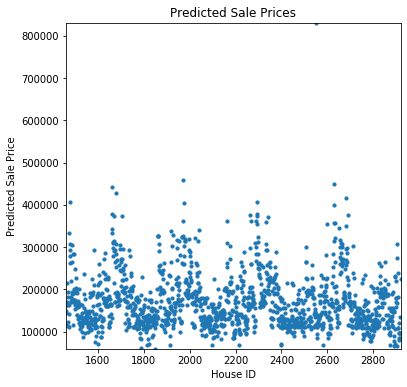

In [38]:
y_pred_ = pd.DataFrame(y_to_pred)
y_test_ = to_pred.reset_index(drop=True, inplace=False)
# # We create a new dataframe containing both the real (y_test) and the predicted value by the model (y_pred)
pred_unknow = pd.concat([y_test_,y_pred_], axis=1).sort_values(1,axis=1).reset_index(drop=True)
pred_unknow = pred_unknow.rename(columns = {0 : 'Predicted_price'})

# Let's represent the preducted values vs the real SalePrice
plt.figure(figsize=(6, 6))
maxlimit = y_pred_.max()
minlimit = y_pred_.min()

plt.scatter(pred_unknow['Id'], pred_unknow['Predicted_price'], s=10)
plt.xlabel('House ID')
plt.ylabel('Predicted Sale Price')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.title('Predicted Sale Prices')
plt.show()

### Evaluation Summary

The evaluation metrics and plots of the model are thus used to validate the model within known acceptable value range and to compare between different future versions or iteration of the model for ‘prediction strength’.

While the current prediction function is now ready to be applied, there are some improvements which can be made to the model:

- Repeat the EDA analysis and consider the addition of more variables to the analysis
- Use a more complex regression algorithm such as XGBOOST or SVR